## Mini-Projeto 2023 - 3.1 "Aplicação do PCA em reconhecimento de dígitos"
### Grupo 4
- Gabriella Lima, pg54401
- Guilherme Martins,  pg52214
- Maria Laires, pg52220
- Matheus Ribeiro, pg52254
### Métricas em Machine Learning - Metrado em Matemática e Computação
#### Ano letivo 2023-24  ;  1º semestre - 1º ano 

A base de dados MNIST foi acedida a partir do website "WayBack Machine" (registo Março de 2022) através do link: https://web.archive.org/web/20220331130319/https://yann.lecun.com/exdb/mnist/  ,  no dia 20 de dezembro de 2023

- Leitura das imagens de treino

In [461]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt

imagefile = 'mnist_database/train-images.idx3-ubyte'
imagearray = idx2numpy.convert_from_file(imagefile)
size = len(imagearray) # nº de imagens para processar

X = [] # novo repositório das imagens

for i in range(0,size):
    aux = imagearray[i].flatten() # transformar cada imagem (matriz) num array simples (linear)
    X.append(aux)
    
# apenas um exemplo
# plt.imshow(np.reshape(X[100], (28,28)), cmap=plt.cm.binary)

labelfile = 'mnist_database/train-labels.idx1-ubyte'
labelarray = idx2numpy.convert_from_file(labelfile)

In [462]:
# Organizar as imagens por dígito

X_digito = [[],[],[],[],[],[],[],[],[],[]]

for i in range(0,len(X)):
    n = labelarray[i] 
    X_digito[n].append(X[i])
 

print("Distribuição das Labels: 0: "+str(len(X_digito[0]))+" ; 1: "+str(len(X_digito[1]))+" ; 2: "+str(len(X_digito[2]))+" ; 3: "+str(len(X_digito[3]))+" ; 4: "+str(len(X_digito[4])))
print(" ; 5: "+str(len(X_digito[5]))+" ; 6: "+str(len(X_digito[6]))+" ; 7: "+str(len(X_digito[7]))+" ; 8: "+str(len(X_digito[8]))+" ; 9: "+str(len(X_digito[9])))

# Gráfico que mostra que cada número aparece aproximadamente igual a 6000 vezes
counts = [len(X_digito[0]), len(X_digito[1]), len(X_digito[2]), len(X_digito[3]), len(X_digito[4]), len(X_digito[5]), len(X_digito[6]), len(X_digito[7]), len(X_digito[8]), len(X_digito[9])]
labels = [0,1,2,3,4,5,6,7,8,9]
# plt.bar(labels, counts)
# plt.show()

Distribuição das Labels: 0: 5923 ; 1: 6742 ; 2: 5958 ; 3: 6131 ; 4: 5842
 ; 5: 5421 ; 6: 5918 ; 7: 6265 ; 8: 5851 ; 9: 5949


 - Exemplos de imagens para cada um dos dígitos

In [463]:
# exemplo de imagem dígito 0
# plt.imshow(np.reshape(X_digito[0][0], (28,28)), cmap=plt.cm.binary)

In [464]:
# exemplo de imagem dígito 1
# plt.imshow(np.reshape(X_digito[1][0], (28,28)), cmap=plt.cm.binary)

In [465]:
# exemplo de imagem dígito 2
# plt.imshow(np.reshape(X_digito[2][0], (28,28)), cmap=plt.cm.binary)

In [466]:
# exemplo de imagem dígito 3
# plt.imshow(np.reshape(X_digito[3][0], (28,28)), cmap=plt.cm.binary)

In [467]:
# exemplo de imagem dígito 4
# plt.imshow(np.reshape(X_digito[4][0], (28,28)), cmap=plt.cm.binary)

In [468]:
# exemplo de imagem dígito 5
# plt.imshow(np.reshape(X_digito[5][0], (28,28)), cmap=plt.cm.binary)

In [469]:
# exemplo de imagem dígito 6
# plt.imshow(np.reshape(X_digito[6][0], (28,28)), cmap=plt.cm.binary)

In [470]:
# exemplo de imagem dígito 7
# plt.imshow(np.reshape(X_digito[7][0], (28,28)), cmap=plt.cm.binary)

In [471]:
# exemplo de imagem dígito 8
# plt.imshow(np.reshape(X_digito[8][0], (28,28)), cmap=plt.cm.binary)

In [472]:
# exemplo de imagem dígito 9
# plt.imshow(np.reshape(X_digito[9][0], (28,28)), cmap=plt.cm.binary)

In [473]:
# Implementação do PCA
# Obter os vetores próprios das componentes principais de acordo com um certo nivel de confianca
def pca(X, confianca_alvo):
    # Media de todas as imagens
    media = np.mean(X, 0)
    
    # Centralizar os dados
    phi = X - media
    
    # Calcular os vetores e valores proprios atraves do SVD
    vet_prop, sigma, v = np.linalg.svd(phi.transpose(), full_matrices=False) # v = variância
    val_prop = sigma*sigma
    
    # Ordenar valores próprios por ordem Decrescente
    idx = np.argsort(-val_prop)
    val_prop = val_prop[idx]
    vet_prop = vet_prop[:,idx]
    
    # Determinar o nº de vetores próprios a usar de acordo com a confiança-alvo
    k = 0
    traco = np.sum(val_prop)
    confianca = 0
    while(confianca < confianca_alvo):
        confianca = np.sum(val_prop[:k])/traco
        k = k+1
    
    # Escolher os vetores próprios associados às componentes principais
    vet_prop = vet_prop[:,0:k]
    return k, val_prop, vet_prop, phi, media, v, confianca

In [474]:
# Exemplo para o dígito 0
k_0, val_prop_0, vet_prop_0, phi_0, media_0, v_0, confianca_0 = pca(X_digito[0], 0.9)

# plt.imshow(np.reshape(media_0, (28,28)), cmap=plt.cm.binary) # visualização da imagem média do dígito

# #len(vet_prop_0)
# len(vet_prop_0[0])
# #len(val_prop_0[0])
# #val_prop_0[0]

In [475]:
# # Exemplo resultante de um vetores próprios / uma das componentes principais da imagem
# plt.imshow(np.reshape(vet_prop_0.T[0], (28,28)), cmap=plt.cm.binary) # visualização da imagem média do dígito

In [476]:
coef_proj = [[],[],[],[],[],[],[],[],[],[]]

# Calculo dos coeficientes da projecao
def coefProj(phi, vet_prop, size):
    coef_proj = [np.dot(phi[i], vet_prop) for i in range(size)]
    return coef_proj

# Obter os coeficientes das projecoes (para o dígito 0)
coef_proj[0] = coefProj(phi_0, vet_prop_0, len(X_digito[0]))
# coef_proj[0]

#### Elbow Method (Método do Cotovelo)

Método Heurístico para verificar se o valor da confiança-alvo foi adequada para a conservação da informação

In [477]:
# # Gráfico do Método do cotovelo
# plt.figure(figsize=(10,10))
# t = np.arange(0, len(val_prop_0), 1)
# plt.plot(t, val_prop_0, 'x')
# plt.plot(k_0, val_prop_0[k_0], 'o')
# plt.show()

## Aplicação do PCA nos restantes dígitos [1..9]

In [478]:
k_1, val_prop_1, vet_prop_1, phi_1, media_1, v_1, confianca_1 = pca(X_digito[1], 0.9)
k_2, val_prop_2, vet_prop_2, phi_2, media_2, v_2, confianca_2 = pca(X_digito[2], 0.9)
k_3, val_prop_3, vet_prop_3, phi_3, media_3, v_3, confianca_3 = pca(X_digito[3], 0.9)
k_4, val_prop_4, vet_prop_4, phi_4, media_4, v_4, confianca_4 = pca(X_digito[4], 0.9)
k_5, val_prop_5, vet_prop_5, phi_5, media_5, v_5, confianca_5 = pca(X_digito[5], 0.9)
k_6, val_prop_6, vet_prop_6, phi_6, media_6, v_6, confianca_6 = pca(X_digito[6], 0.9)
k_7, val_prop_7, vet_prop_7, phi_7, media_7, v_7, confianca_7 = pca(X_digito[7], 0.9)
k_8, val_prop_8, vet_prop_8, phi_8, media_8, v_8, confianca_8 = pca(X_digito[8], 0.9)
k_9, val_prop_9, vet_prop_9, phi_9, media_9, v_9, confianca_9 = pca(X_digito[9], 0.9)

# Juntar todos os resultados
k_digito = [k_0, k_1, k_2, k_3, k_4, k_5, k_6, k_7, k_8, k_9]
val_prop_digito = [val_prop_0, val_prop_1, val_prop_2, val_prop_3, val_prop_4, val_prop_5, val_prop_6, val_prop_7, val_prop_8, val_prop_9]
vet_prop_digito = [vet_prop_0, vet_prop_1, vet_prop_2, vet_prop_3, vet_prop_4, vet_prop_5, vet_prop_6, vet_prop_7, vet_prop_8, vet_prop_9]
phi_digito = [phi_0, phi_1, phi_2, phi_3, phi_4, phi_5, phi_6, phi_7, phi_8, phi_9]
media_digito = [media_0, media_1, media_2, media_3, media_4, media_5, media_6, media_7, media_8, media_9]
v_digito = [v_0, v_1, v_2, v_3, v_4, v_5, v_6, v_7, v_8, v_9]
confianca_digito = [confianca_0, confianca_1, confianca_2, confianca_3, confianca_4, confianca_5, confianca_6, confianca_7, confianca_8, confianca_9]

Número de valores próprios para cada modelo de dígito

In [479]:
k_digito

[63, 37, 82, 81, 77, 76, 63, 67, 83, 63]

In [480]:
# plt.imshow(np.reshape(media_1, (28,28)), cmap=plt.cm.binary) # visualização da imagem média do dígito

In [481]:
# plt.imshow(np.reshape(media_2, (28,28)), cmap=plt.cm.binary) # visualização da imagem média do dígito

In [482]:
# plt.imshow(np.reshape(media_3, (28,28)), cmap=plt.cm.binary) # visualização da imagem média do dígito

In [483]:
# plt.imshow(np.reshape(media_4, (28,28)), cmap=plt.cm.binary) # visualização da imagem média do dígito

In [484]:
# plt.imshow(np.reshape(media_5, (28,28)), cmap=plt.cm.binary) # visualização da imagem média do dígito

In [485]:
# plt.imshow(np.reshape(media_6, (28,28)), cmap=plt.cm.binary) # visualização da imagem média do dígito

In [486]:
# plt.imshow(np.reshape(media_7, (28,28)), cmap=plt.cm.binary) # visualização da imagem média do dígito

In [487]:
# plt.imshow(np.reshape(media_8, (28,28)), cmap=plt.cm.binary) # visualização da imagem média do dígito

In [488]:
# plt.imshow(np.reshape(media_9, (28,28)), cmap=plt.cm.binary) # visualização da imagem média do dígito

In [489]:
# plt.figure(figsize=(10,10))
# t = np.arange(0, len(val_prop_1), 1)
# plt.plot(t, val_prop_1, 'x')
# plt.plot(k_1, val_prop_1[k_1], 'o')
# plt.show()

In [490]:
# plt.figure(figsize=(10,10))
# t = np.arange(0, len(val_prop_2), 1)
# plt.plot(t, val_prop_2, 'x')
# plt.plot(k_2, val_prop_2[k_2], 'o')
# plt.show()

In [491]:
# plt.figure(figsize=(10,10))
# t = np.arange(0, len(val_prop_3), 1)
# plt.plot(t, val_prop_3, 'x')
# plt.plot(k_3, val_prop_3[k_3], 'o')
# plt.show()

In [492]:
# plt.figure(figsize=(10,10))
# t = np.arange(0, len(val_prop_4), 1)
# plt.plot(t, val_prop_4, 'x')
# plt.plot(k_4, val_prop_4[k_4], 'o')
# plt.show()

In [493]:
# plt.figure(figsize=(10,10))
# t = np.arange(0, len(val_prop_5), 1)
# plt.plot(t, val_prop_5, 'x')
# plt.plot(k_5, val_prop_5[k_5], 'o')
# plt.show()

In [494]:
# plt.figure(figsize=(10,10))
# t = np.arange(0, len(val_prop_6), 1)
# plt.plot(t, val_prop_6, 'x')
# plt.plot(k_6, val_prop_6[k_6], 'o')
# plt.show()

In [495]:
# plt.figure(figsize=(10,10))
# t = np.arange(0, len(val_prop_7), 1)
# plt.plot(t, val_prop_7, 'x')
# plt.plot(k_7, val_prop_7[k_7], 'o')
# plt.show()

In [496]:
# plt.figure(figsize=(10,10))
# t = np.arange(0, len(val_prop_8), 1)
# plt.plot(t, val_prop_8, 'x')
# plt.plot(k_8, val_prop_8[k_8], 'o')
# plt.show()

In [497]:
# plt.figure(figsize=(10,10))
# t = np.arange(0, len(val_prop_9), 1)
# plt.plot(t, val_prop_9, 'x')
# plt.plot(k_9, val_prop_9[k_9], 'o')
# plt.show()

### Cálculo dos coeficientes de projeção para os dígitos restantes [1..9]

In [498]:
for num in range(1,10):
    coef_proj[num] = coefProj(phi_digito[num], vet_prop_digito[num], len(X_digito[num]))

### Preparação para os Testes

Funções úteis para os testes do modelo construído

In [499]:
import math

# Distancia euclidiana
def euclidiana(x, y):
    distancia = np.linalg.norm(x - y)
    return distancia

# Distance de Mahalanobis (distância euclidiana normalizada)
def mahalanobis(x, y, val_prop, k):
    distancia = np.sum(np.divide((x - y) ** 2, val_prop[:k]))
    return distancia

In [500]:
def test_coef_proj(gamma, media, vet_prop):
    test_phi = gamma - media # Centralizar os dados de gamma
    
    # Calcular os coeficientes de projeção 
    test_coef_proj = np.dot(test_phi, vet_prop)
    return test_coef_proj

def dist_min_euclidiana(test_coef_proj, size, coef_proj):
    dist = [euclidiana(coef_proj[i], test_coef_proj) for i in range (size)]
    dist_min = np.min(dist)
    return dist_min

def dist_min_mahalanobis(test_coef_proj, val_prop, size, coef_proj, k):
    dist = [mahalanobis(coef_proj[i], test_coef_proj, val_prop, k) for i in range (size)]
    dist_min = np.min(dist)
    return dist_min

### Pré-estudo do dataset de teste

In [501]:
# 10 mil imagens de dígitos para teste
image_test_file = 'mnist_database/t10k-images.idx3-ubyte'
image_test_array = idx2numpy.convert_from_file(image_test_file)

gamma = [] # novo repositório das imagens de teste

for i in range(0,len(image_test_array)):
    aux = image_test_array[i].flatten() # transformar cada imagem (matriz) num array simples (linear)
    gamma.append(aux)

label_test_file = 'mnist_database/t10k-labels.idx1-ubyte'
label_test_array = idx2numpy.convert_from_file(label_test_file)

if not [label for label in label_test_array if label in [0,1,2,3,4,5,6,7,8,9]]:
    print("Existem dígitos diferentes de [0,1..9]")
else:
    print("Tudo certo (só existem dígitos dentro do intervalo [0,1..9])")

Tudo certo (só existem dígitos dentro do intervalo [0,1..9])


Como no dataset de teste todas as imagens são obrigatoriamente dígitos, então decidiu-se reduzir o estudo do modelo construído para reconhecimento de dígitos para estudar o dígito que fornece menor distância entre os coeficientes das projeções com os de teste da imagem atual; em vez de se estudar o reconheciemnto de um dígito pela comparação da distância com um limite / limiar de similaridade (que pode produzir resultados inválidos, já que o limite depende de quem constroi o programa e das métricas utilizadas).

In [502]:
number_labels = [0,0,0,0,0,0,0,0,0,0]

for n in range(0,10000):
    digito = label_test_array[n]
    number_labels[digito] = number_labels[digito] + 1
    
# plt.bar([0,1,2,3,4,5,6,7,8,9], number_labels)
# plt.show()

In [503]:
number_labels

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]

### Testes - Distância Euclidiana

In [504]:
# devolve o dígito reconhecido pela imagem, comparando com todas as distâncias das projeções para os 10 digítos possíveis
def testar_imagem_euclidiana(imagem):
    dist_min_digito = [0,0,0,0,0,0,0,0,0,0]
    for dig in range(0,10):
        test_phi = imagem - media_digito[dig] # Centralizar os dados de gamma
    
        # Calcular os coeficientes de projeção 
        test_coef_proj = np.dot(test_phi, vet_prop_digito[dig])
        
        dist_min_digito[dig] = dist_min_euclidiana(test_coef_proj, len(coef_proj[dig]), coef_proj[dig])
    
    minimo_dist = np.min(dist_min_digito)
    digito_reconhecido = dist_min_digito.index(minimo_dist)
    
    return digito_reconhecido, minimo_dist

In [505]:
# results_euclidiana_imagens = [] # cada valor indica a label da imagem no índice i
# dists_euclidiana_test = [] # distância obtida para cada imagem, do seu correspondente dígito selecionado

# # nº de casos em que o dígito previsto é equivalente ao verdadeiro dígito da imagem
# positives_euclidiana = [0,0,0,0,0,0,0,0,0,0]

# # CUIDADO: esta parte do código demorar aproximadamente 50 minutos para ser executado na sua totalidade
# for i in range(0,10000):
#     imagem = gamma[i]
#     label = label_test_array[i]
    
#     digito_reconhecido, minimo_dist = testar_imagem_euclidiana(imagem)
    
#     results_euclidiana_imagens.append(digito_reconhecido)
    
#     # verificar se o dígito reconhecido é igual ao esperado
#     if digito_reconhecido == label:
#         positives_euclidiana[label] = positives_euclidiana[label] + 1
#         dists_euclidiana_test.append(minimo_dist)

# print("Terminados os testes às 10000 imagens!")

- Cálculo da Accuracy (resultados obtidos com a distância euclidiana)

In [506]:
# accuracy_euclidiana = sum(positives_euclidiana) / 10000    # total das 10000 imagens testadas
# accuracy_euclidiana

Agora a accuracy para cada um dos dígitos

In [507]:
# accuracy_euclidiana_digito = []

# for i in range(0,10):
#     acc = positives_euclidiana[i] / number_labels[i]
#     accuracy_euclidiana_digito.append(acc)

# accuracy_euclidiana_digito

Distância de Mahalanobis, também conhecida por Distância Euclidiana PONDERADA, onde as distâncias são "corrigidas" pela soma da divisão dos valores próprios da espaço do dígito que está a testar atualmente. Deste modo, temos a certeza que estamos a comparar distância numa dimensão correta.

### Testes - Distância Mahalanobis

In [508]:
# devolve o dígito reconhecido pela imagem, comparando com todas as distâncias das projeções para os 10 digítos possíveis
def testar_imagem_mahalanobis(imagem):
    dist_min_digito = [0,0,0,0,0,0,0,0,0,0]
    for dig in range(0,10):
        test_phi = imagem - media_digito[dig] # Centralizar os dados de gamma
    
        # Calcular os coeficientes de projeção 
        test_coef_proj = np.dot(test_phi, vet_prop_digito[dig])
        
        dist_min_digito[dig] = dist_min_mahalanobis(test_coef_proj, val_prop_digito[dig], len(coef_proj[dig]), coef_proj[dig], k_digito[dig])
    
    minimo_dist = np.min(dist_min_digito)
    digito_reconhecido = dist_min_digito.index(minimo_dist)
    
    return digito_reconhecido, minimo_dist

In [509]:
# results_mahalanobis_imagens = [] # cada valor indica a label da imagem no índice i
# dists_mahalanobis_test = [] # distância obtida para cada imagem, do seu correspondente dígito selecionado

# # nº de casos em que o dígito previsto é equivalente ao verdadeiro dígito da imagem
# positives_mahalanobis = [0,0,0,0,0,0,0,0,0,0]

# # CUIDADO: esta parte do código demora aproximadamente 50 minutos para ser executado na sua totalidade
# for i in range(0,10000):
#     print(str(i))
#     imagem = gamma[i]
#     label = label_test_array[i]
    
#     digito_reconhecido, minimo_dist = testar_imagem_mahalanobis(imagem)
    
#     results_mahalanobis_imagens.append(digito_reconhecido)
    
#     # verificar se o dígito reconhecido é igual ao esperado
#     if digito_reconhecido == label:
#         positives_mahalanobis[label] = positives_mahalanobis[label] + 1
#         dists_mahalanobis_test.append(minimo_dist)

# print("Terminado os testes às 10000 imagens!")

- Cálculo da Accuracy (resultados obtidos com a distância mahalanobis)

In [510]:
# accuracy_mahalanobis = sum(positives_mahalanobis) / 10000    # total de 10000 imagens testadas
# accuracy_mahalanobis

Agora a accuracy para cada um dos dígitos

In [511]:
# accuracy_mahalanobis_digito = []

# for i in range(0,10):
#     acc = positives_mahalanobis[i] / number_labels[i]
#     accuracy_mahalanobis_digito.append(acc)

# accuracy_mahalanobis_digito

A distância de Mahalanobis foi a que conseguiu reconhecer com maior precisão os dígitos nas imagens de teste.

__Reflexão__: A técnica apresentada é apenas uma das maneiras para o reconhecimento de dígitos. A utilização de um limite de similaridade poderia aumentar a accuracy dos resultados, mas a determinação desse limite exige muitos testes e que podem demorar tempo a ser concluídos, nomeadamente num dataset relativamente grande como o do MNIST.
Outras opções incluem a utilização do PCA juntamente com um algoritmo de clustering, como o do K-means.

### Visualização e Comparação de imagens que o modelo construído não conseguiu reconhecer o dígito

##### Para os casos da distância Euclidiana

In [512]:
# indexes_test_wrong_euclidiana = []

# for l in range(0,10000):
#     if results_euclidiana_imagens[l] != label_test_array[l]:
#         indexes_test_wrong_euclidiana.append(l)

In [513]:
# indexes_test_wrong_euclidiana

In [514]:
# plt.imshow(np.reshape(gamma[indexes_test_wrong_euclidiana[0]], (28,28)), cmap=plt.cm.binary)

In [515]:
# label_test_array[indexes_test_wrong_euclidiana[0]]

In [516]:
# results_euclidiana_imagens[indexes_test_wrong_euclidiana[0]]

------------------------------------------------

In [517]:
# plt.imshow(np.reshape(gamma[indexes_test_wrong_euclidiana[1]], (28,28)), cmap=plt.cm.binary)

In [518]:
# label_test_array[indexes_test_wrong_euclidiana[1]]

In [519]:
# results_euclidiana_imagens[indexes_test_wrong_euclidiana[1]]

##### Para os casos da distância de Mahalanobis

In [520]:
# indexes_test_wrong_mahalanobis = []

# for l in range(0,10000):
#     if results_mahalanobis_imagens[l] != label_test_array[l]:
#         indexes_test_wrong_mahalanobis.append(l)

In [521]:
# indexes_test_wrong_mahalanobis

In [522]:
# plt.imshow(np.reshape(gamma[indexes_test_wrong_mahalanobis[0]], (28,28)), cmap=plt.cm.binary)

In [523]:
# label_test_array[indexes_test_wrong_mahalanobis[0]]

In [524]:
# results_mahalanobis_imagens[indexes_test_wrong_mahalanobis[0]]

------------------------------------------------

In [525]:
# plt.imshow(np.reshape(gamma[indexes_test_wrong_mahalanobis[1]], (28,28)), cmap=plt.cm.binary)

In [526]:
# label_test_array[indexes_test_wrong_mahalanobis[1]]

In [527]:
# results_mahalanobis_imagens[indexes_test_wrong_mahalanobis[1]]

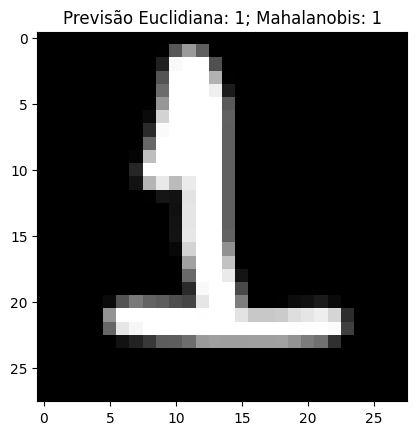

In [531]:
from PIL import Image

image_path = 'image1.png'
imagem = Image.open(image_path)
imagem = Image.eval(imagem, lambda x: 255 - x) # Inveter as cores (estava ficando com fundo preto)
imagem = imagem.convert('L') # Implementar escala cinza (igual no dataset MNIST)
imagem_redimensionada = imagem.resize((28, 28)) # Redimensiona para (28,28) igual ao dataset
imagem_array = np.array(imagem_redimensionada)

imagem_para_teste = imagem_array.flatten()
previsao_euclidiana = str(testar_imagem_euclidiana(imagem_para_teste)[0])
previsao_mahalanobis = str(testar_imagem_mahalanobis(imagem_para_teste)[0])

plt.imshow(imagem_array, cmap='gray')
plt.title(f'Previsão Euclidiana: {previsao_euclidiana}; Mahalanobis: {previsao_mahalanobis}')
plt.show()

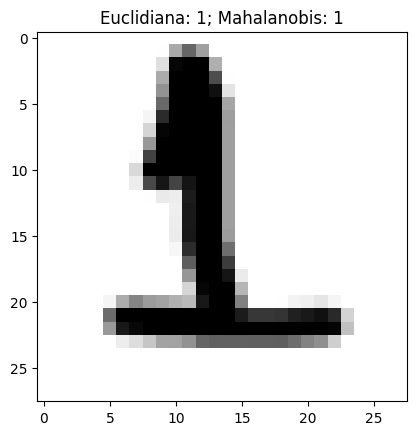

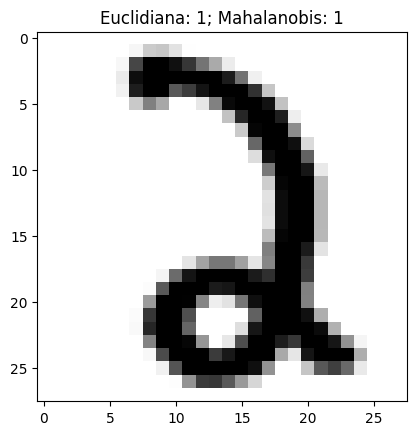

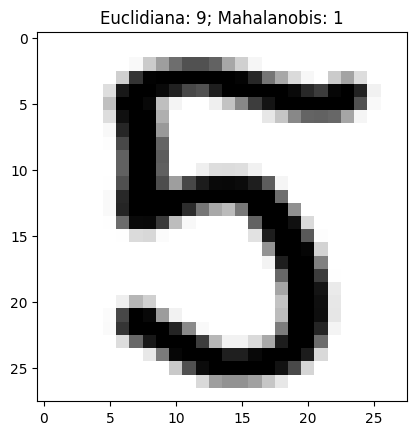

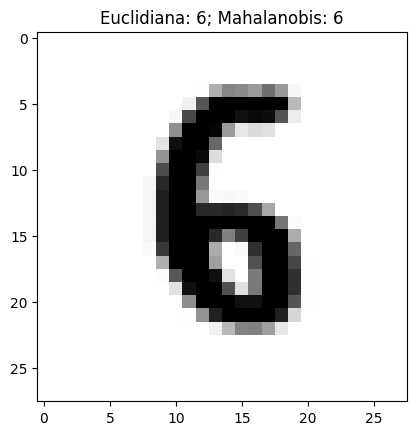

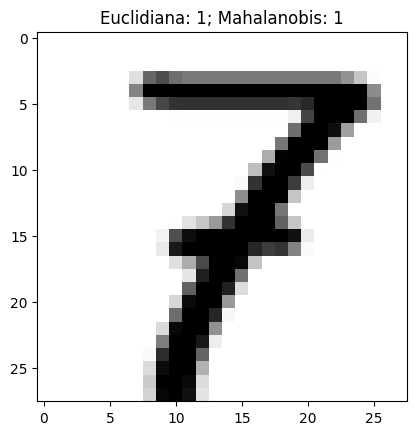

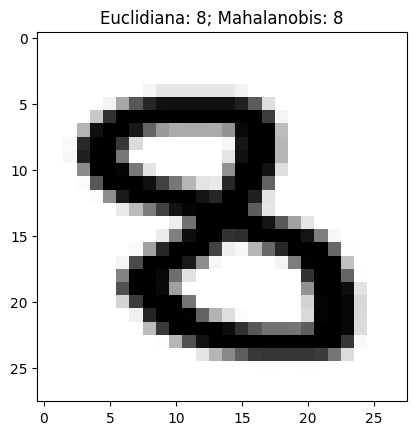

In [535]:
import os
from PIL import Image

for i in range(0, 10):
    image_path = 'image'+str(i)+'.png'
    if os.path.exists(image_path):
        imagem = Image.open(image_path)
        imagem = Image.eval(imagem, lambda x: 255 - x) # Inveter as cores (estava ficando com fundo preto)
        imagem = imagem.convert('L') # Implementar escala cinza (igual no dataset MNIST)
        imagem_redimensionada = imagem.resize((28, 28)) # Redimensiona para (28,28) igual ao dataset
        imagem_array = np.array(imagem_redimensionada)

        imagem_para_teste = imagem_array.flatten()
        previsao_euclidiana = str(testar_imagem_euclidiana(imagem_para_teste)[0])
        previsao_mahalanobis = str(testar_imagem_mahalanobis(imagem_para_teste)[0])

        plt.imshow(imagem_array, cmap=plt.cm.binary)
        plt.title(f'Euclidiana: {previsao_euclidiana}; Mahalanobis: {previsao_mahalanobis}')
        plt.show()